# Import libraries

In [25]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

# Data generation

In [16]:
X, y = make_blobs(n_samples=1500, centers=[[1,1],[3,3],[6,6]] ,  cluster_std=0.5)
                               

# Modeling

In [17]:
db = DBSCAN(eps=0.5, min_samples=7, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(X)

In [18]:
labels = db.labels_
core_samples = db.core_sample_indices_
print(labels , core_samples)

[0 0 0 ... 1 0 1] [   0    1    2 ... 1497 1498 1499]


# Distinguish outliers

In [19]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True], shape=(1500,))

In [20]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

In [21]:
unique_labels = set(labels)
unique_labels

{np.int64(-1), np.int64(0), np.int64(1)}

# Data visualization

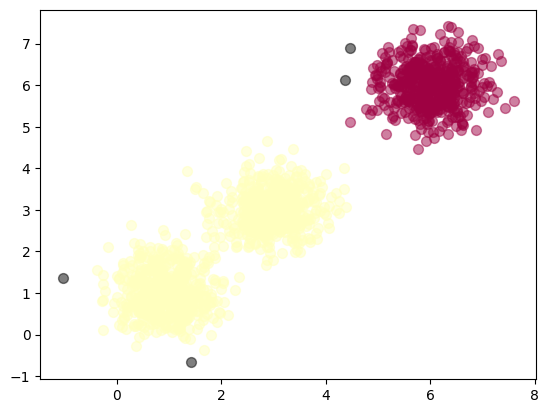

In [22]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

# Read csv file

In [39]:
df = pd.read_csv("cars_clus.csv")
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


# Preprocess

In [47]:
df.replace('$null$', np.nan, inplace=True)
print(df.isnull().sum())

manufact      0
model         0
sales         2
resale       38
type          2
price         0
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       2
partition     0
dtype: int64


In [48]:
X_clean = X.dropna()

# Data generation

In [62]:
X = df[['sales'	,'resale',	'type'	,'price',	'engine_s'	,'horsepow'	,'wheelbas'	,'width'	,'length'	,'curb_wgt'	,'fuel_cap',	'mpg',	'lnsales'	,'partition']]

# Fit model

In [63]:
db = DBSCAN(eps=0.7, min_samples=7, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(X_clean)

In [64]:
labels = db.labels_
core_samples = db.core_sample_indices_
print(labels , core_samples)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1] []
